<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/TFLite_LinearRegression_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from google.colab import files

Create a basic model of the form y=mx+c

In [3]:
# Create a simple Keras model
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 24.0786
Epoch 2/200
1/1 [==============================] - 0s 897us/step - loss: 19.2299
Epoch 3/200
1/1 [==============================] - 0s 776us/step - loss: 15.4093
Epoch 4/200
1/1 [==============================] - 0s 765us/step - loss: 12.3977
Epoch 5/200
1/1 [==============================] - 0s 810us/step - loss: 10.0227
Epoch 6/200
1/1 [==============================] - 0s 804us/step - loss: 8.1486
Epoch 7/200
1/1 [==============================] - 0s 729us/step - loss: 6.6688
Epoch 8/200
1/1 [==============================] - 0s 881us/step - loss: 5.4992
Epoch 9/200
1/1 [==============================] - 0s 947us/step - loss: 4.5739
Epoch 10/200
1/1 [==============================] - 0s 619us/step - loss: 3.8408
Epoch 11/200
1/1 [==============================] - 0s 723us/step - loss: 3.2590
Epoch 12/200
1/1 [==============================] - 0s 915us/step - loss: 2.7965
Epoch 13/200
1/1 [================

Generate a Saved Model

In [4]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1/assets


Convert the SavedModel to TFLite

In [5]:
# Convert the Model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

776

Initialize TF Lite Interpreter to try Out

In [7]:
# Load TFLite model and allocate tensor
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
# test the Tensorflow lite model on random input data
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test Tensorflow model on random input data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

Model Viz

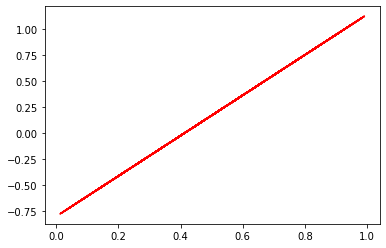

In [9]:
plt.plot(inputs, outputs, 'r')
plt.show()

Download the TFLite model file

In [10]:
files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>